# ASTROPY EXPLORATION

Astropy is a package that can be downloaded directly fron Anaconda. It is hosted at astropy.org

http://docs.astropy.org/en/stable/getting_started.html

Is a goot place to get started, but we'll try our hand at dealing with some data.

In [1]:
#Preamble. These are some standard things I like to include in IPython Notebooks.
import astropy
from astropy.table import Table, Column, MaskedColumn
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord, Angle
import astropy.cosmology as cos
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

First we'll download a fits file from SDSS. This is a fits table rather than a fits image, but the general principle for opening any of these is the same. Astropy's I/O is so advanced that it basically will do exactly what you want unless you are opening a mosaic or a multispec file, and then it is generally the case that you can find affiliated packages which can handle the proper data opening.

In [3]:
cat_file='data/DR9Q.fits'
hdu = fits.open(cat_file)
hdu.info()

Filename: data/DR9Q.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      16   (15819,)     uint8   
1    DR9Q        BinTableHDU    536   87822R x 131C   [18A, D, D, J, J, J, J, D, D, D, J, D, D, D, D, D, D, I, K, K, K, J, J, J, J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D, D, J, D, D, J, D, D, D, D, D, I, J, 3A, I, I, 19A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, J, D, D, D, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


Typically, you'll want to discover the metadata by reading in the header. For our FITS table, the header isn't as illuminating as it will be for an image file, for example.

In [10]:
cat_header=hdu[0].header
cat_header

SIMPLE  =                    T / Standard FITS format                           
BITPIX  =                    8 / Character data                                 
NAXIS   =                    1 / Text string                                    
NAXIS1  =                15819 / Number of characters                           
VOTMETA =                    T / Table metadata in VOTable format               
EXTEND  =                    T / There are standard extensions                  
COMMENT                                                                         
COMMENT The data in this primary HDU consists of bytes which                    
COMMENT comprise a VOTABLE document.                                            
COMMENT The VOTable describes the metadata of the table contained               
COMMENT in the following BINTABLE extension.                                    
COMMENT Such a BINTABLE extension can be used on its own as a perfectly         
COMMENT good table, but the 

This metadata often contains information you will want to use or manipulate later. In that case, it's pretty straightforward to call it.

In [11]:
print cat_header['NAXIS1']

15819


However, what you really want to see is the data, right? From this point on, we'll be referring explicitly to a fits datatable instead of image. One thing to keep in mind is that the data will be read into a numpy array with a zero-based index in the [y, x] order as was discussed in a previous Python club meeting.

In [2]:
cat_data=hdu[1].data
cat_data.columns

Filename: DR9Q.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      16   (15819,)     uint8   
1    DR9Q        BinTableHDU    536   87822R x 131C   [18A, D, D, J, J, J, J, D, D, D, J, D, D, D, D, D, D, I, K, K, K, J, J, J, J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D, D, J, D, D, J, D, D, D, D, D, I, J, 3A, I, I, 19A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, J, D, D, D, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


ColDefs(
    name = 'SDSS_NAME'; format = '18A'; unit = '-'
    name = 'RA'; format = 'D'; unit = 'DEGREE'
    name = 'DEC'; format = 'D'; unit = 'DEGREE'
    name = 'THING_ID'; format = 'J'; unit = '-'
    name = 'PLATE'; format = 'J'; unit = '-'
    name = 'MJD'; format = 'J'; unit = '-'
    name = 'FIBERID'; format = 'J'; unit = '-'
    name = 'Z_VI'; format = 'D'; unit = '-'
    name = 'Z_PIPE'; format = 'D'; unit = '-'
    name = 'ERR_ZPIPE'; format = 'D'; unit = '-'
    name = 'ZWARNING'; format = 'J'; unit = '-'
    name = 'Z_PCA'; format = 'D'; unit = '-'
    name = 'ERR_ZPCA'; format = 'D'; unit = '-'
    name = 'PCA_QUAL'; format = 'D'; unit = '-'
    name = 'Z_CIV'; format = 'D'; unit = '-'
    name = 'Z_CIII'; format = 'D'; unit = '-'
    name = 'Z_MGII'; format = 'D'; unit = '-'
    name = 'SDSS_MORPHO'; format = 'I'; unit = '-'
    name = 'BOSS_TARGET1'; format = 'K'; unit = '-'
    name = 'ANCILLARY_TARGET1'; format = 'K'; unit = '-'
    name = 'ANCILLARY_TARGET2'; forma

This is a particular kind of "FITS record" rather than a data table. You might want to convert this into an astropy data table to see its functionality. Another option would be to convert this into a pandas dataframe, but we'll let Roberto handle that idea at a later time.

In [17]:
data = Table(cat_data)

Let's see how this differs from the other object above. You can get a sense just be doing the self call.

In [18]:
data

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,Z_VI,Z_PIPE,ERR_ZPIPE,ZWARNING,Z_PCA,ERR_ZPCA,PCA_QUAL,Z_CIV,Z_CIII,Z_MGII,SDSS_MORPHO,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,SDSS_DR7,PLATE_DR7,MJD_DR7,FIBERID_DR7,UNIFORM,MI,DGMI,ALPHA_NU,SNR_SPEC,SNR_1700,SNR_3000,SNR_5150,FWHM_CIV,BHWHM_CIV,RHWHM_CIV,AMP_CIV,REWE_CIV,ERR_REWE_CIV,FWHM_CIII,BHWHM_CIII,RHWHM_CIII,AMP_CIII,REWE_CIII,ERR_REWE_CIII,FWHM_MGII,BHWHM_MGII,RHWHM_MGII,AMP_MGII,REWE_MGII,ERR_REWE_MGII,BAL_FLAG_VI,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,DI_CIV,ERR_DI_CIV,CHI2TROUGH,NCIV_2000,VMIN_CIV_2000,VMAX_CIV_2000,NCIV_450,VMIN_CIV_450,VMAX_CIV_450,REW_SIIV,REW_CIV,REW_ALIII,RUN_NUMBER,PHOTO_MJD,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,UFLUX,ERR_UFLUX,GFLUX,ERR_GFLUX,RFLUX,ERR_RFLUX,IFLUX,ERR_IFLUX,ZFLUX,ERR_ZFLUX,TARGET_UFLUX,TARGET_GFLUX,TARGET_RFLUX,TARGET_IFLUX,TARGET_ZFLUX,U_EXT,HI_GAL,RASS_COUNT,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,NUVFLUX,ERR_NUVFLUX,FUVFLUX,ERR_FUVFLUX,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,SDSS2WISE_SEP,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
str18,float64,float64,int32,int32,int32,int32,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,int16,int64,int64,int64,int32,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,int32,float64,float64,float64,float64,float64,int16,int32,str3,int16,int16,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,int32,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
000000.47-002703.9,0.00197831659392,-0.451088294717,85874308,4216,55477,310,0.25,0.249952957034,4.44032411906e-05,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,0,68719476736,0,0,685,52203,178,0,-20.7881925442,0.658929385201,500.0,6.49142721487,-1.0,1.77142105606,7.84186338653,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2728,52231,301,2,413,1237657190368346361,2.10464334488,0.251895345458,3.34651851654,0.128381692532,6.30769968033,0.175069102903,8.80151939392,0.235546353246,11.4227657318,0.812136318171,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0.212342917919,20.5343434568,-9.0,-9.0,0.0,2.4585442543,78.2909271,2.5156826973,61.5269682,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,16.012,0.077,14.0,0.8629,15.497,0.166,6.6,0.9684,12.163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.205726377502,0.0,0.0,0.0
000001.93-001427.4,0.00806669135031,-0.24097078526,87837348,4216,55477,312,2.163,2.16453075409,0.000302524451399,0,2.16007701253,-1.0,0.0541167216808,2.15088819426,2.15465589026,2.16833757817,0,2199023255552,0,8,1,-1,-1,-1,0,-26.1409116142,0.0810805915605,-0.0911119177982,7.06683969348,9.50213116971,2.07160085751,-1.0,6538.1626008,3118.87706723,3419.28553357,7.57619096816,29.0224373899,0.872970491405,7925.87818757,3763.58657783,4162.29160973,2.98835074972,28.1557852541,1.34855053201,5143.80974938,2371.29470013,2772.51504924,2.80710051702,37.5869327781,1.4014457384,0,14.5377544497,1.69026289853,606.441066226,37.2281206519,358.166755507,20.7121455508,21.48386854,0,-13187.6563803,-11035.8632193,4,-13963.3027523,-1552.96080067,0.0,0.0,0.0,4263,52963,301,3,116,1237663783660552482,6.77103662491,0.285805492849,9.08086204529,0.202807899475,10.690320015,0.19394244101,11.2202253342,0.373180271121,13.3

I note that this table is fairly large, so let's pare it down a bit.

In [20]:
len(data)

87822

In [25]:
truncated_data = data[0:49]

print(truncated_data)

    SDSS_NAME             RA        ...   FIRST_SNR    SDSS2FIRST_SEP
------------------ ---------------- ... ------------- ---------------
000000.47-002703.9 0.00197831659392 ...           0.0             0.0
000001.93-001427.4 0.00806669135031 ...           0.0             0.0
000003.17+011510.6  0.0132289989878 ...           0.0             0.0
000004.61+035122.4   0.019223183834 ...           0.0             0.0
00004.967-001642.0   0.020695853072 ...           0.0             0.0
000005.02-003829.0  0.0209285614674 ...           0.0             0.0
000007.58+002943.2  0.0316175511158 ...           0.0             0.0
000009.27+020622.0  0.0386573639274 ...           0.0             0.0
000013.03+044403.5  0.0543102195074 ...           0.0             0.0
000014.07+012951.5  0.0586536988573 ...           0.0             0.0
               ...              ... ...           ...             ...
000048.17+013313.6   0.200734237359 ...           0.0             0.0
000050.59+010959.1  

There are other ways you may want to view your table. For example, the "show in notebook" functionality.

In [24]:
truncated_data.show_in_notebook()

idx,SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,Z_VI,Z_PIPE,ERR_ZPIPE,ZWARNING,Z_PCA,ERR_ZPCA,PCA_QUAL,Z_CIV,Z_CIII,Z_MGII,SDSS_MORPHO,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,SDSS_DR7,PLATE_DR7,MJD_DR7,FIBERID_DR7,UNIFORM,MI,DGMI,ALPHA_NU,SNR_SPEC,SNR_1700,SNR_3000,SNR_5150,FWHM_CIV,BHWHM_CIV,RHWHM_CIV,AMP_CIV,REWE_CIV,ERR_REWE_CIV,FWHM_CIII,BHWHM_CIII,RHWHM_CIII,AMP_CIII,REWE_CIII,ERR_REWE_CIII,FWHM_MGII,BHWHM_MGII,RHWHM_MGII,AMP_MGII,REWE_MGII,ERR_REWE_MGII,BAL_FLAG_VI,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,DI_CIV,ERR_DI_CIV,CHI2TROUGH,NCIV_2000,VMIN_CIV_2000,VMAX_CIV_2000,NCIV_450,VMIN_CIV_450,VMAX_CIV_450,REW_SIIV,REW_CIV,REW_ALIII,RUN_NUMBER,PHOTO_MJD,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,UFLUX,ERR_UFLUX,GFLUX,ERR_GFLUX,RFLUX,ERR_RFLUX,IFLUX,ERR_IFLUX,ZFLUX,ERR_ZFLUX,TARGET_UFLUX,TARGET_GFLUX,TARGET_RFLUX,TARGET_IFLUX,TARGET_ZFLUX,U_EXT,HI_GAL,RASS_COUNT,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,NUVFLUX,ERR_NUVFLUX,FUVFLUX,ERR_FUVFLUX,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,SDSS2WISE_SEP,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
0,000000.47-002703.9,0.00197831659392,-0.451088294717,85874308,4216,55477,310,0.25,0.249952957034,4.44032411906e-05,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,0,68719476736,0,0,685,52203,178,0,-20.7881925442,0.658929385201,500.0,6.49142721487,-1.0,1.77142105606,7.84186338653,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2728,52231,301,2,413,1237657190368346361,2.10464334488,0.251895345458,3.34651851654,0.128381692532,6.30769968033,0.175069102903,8.80151939392,0.235546353246,11.4227657318,0.812136318171,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0.212342917919,20.5343434568,-9.0,-9.0,0.0,2.4585442543,78.2909271,2.5156826973,61.5269682,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,16.012,0.077,14.0,0.8629,15.497,0.166,6.6,0.9684,12.163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.205726377502,0.0,0.0,0.0
1,000001.93-001427.4,0.00806669135031,-0.24097078526,87837348,4216,55477,312,2.163,2.16453075409,0.000302524451399,0,2.16007701253,-1.0,0.0541167216808,2.15088819426,2.15465589026,2.16833757817,0,2199023255552,0,8,1,-1,-1,-1,0,-26.1409116142,0.0810805915605,-0.0911119177982,7.06683969348,9.50213116971,2.07160085751,-1.0,6538.1626008,3118.87706723,3419.28553357,7.57619096816,29.0224373899,0.872970491405,7925.87818757,3763.58657783,4162.29160973,2.98835074972,28.1557852541,1.34855053201,5143.80974938,2371.29470013,2772.51504924,2.80710051702,37.5869327781,1.4014457384,0,14.5377544497,1.69026289853,606.441066226,37.2281206519,358.166755507,20.7121455508,21.48386854,0,-13187.6563803,-11035.8632193,4,-13963.3027523,-1552.96080067,0.0,0.0,0.0,4263,52963,301,3,116,1237663783660552482,6.77103662491,0.285805492849,9.08086204529,0.202807899475,10.690320015,0.19394244101,11.2202253342,0.373180271121,13.3799591064,0.758386800562,5.66870832443,7.71396303177,7.71396303177,7.71396303177,7.71396303177,0.175267785788,20.5431364148,-9.0,-9.0,0.0,0.8409730792,218.7284794,-0.031143887,774.7557397,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,16.683,0.133,8.2,0.8558,15.694,0.181,6.0,0.9398,11.979,0.303,3.6,0.9257,9.012,0.0,0.0,0.0,0.791973981391,0.0,0.0,0.0
2,000003.17+011510.6,0.0132289989878,1.25296711228,124419674,4296,55499,364,2.354,2.35428118706,0.000525987532455,0,2.35223260658,-1.0,0.111959523853,2.35299894126,2.3485447737,2.36535366127,0,16492675088384,0,16,1,-1,-1,-1,1,-25.414104132,0.0455786015779,0.244583287896,2.8580424133,3.43100347149,0.853030222339,-1.0,6492.38435707,3145.28223579,3347.10212128,4.56907780819,32.8177703777,0.872815690514,8362.41213954,4014.3548025,4348.05733704,1.6298103419,34.5995031123,3.66949158374,6756.70114729,1823.17242653,4933.52872076,1.36277876512,52.0748750007,3.94385402445,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,771

There is also an option to show it in browser either as a static HTML or sortable javascript table.

In [26]:
truncated_data.show_in_browser()

truncated_data.show_in_browser(jsviewer=True)

Astropy also contains a number of "units" objects which can be very useful. We have to add these by hand at this point (I think, but correct me if you know of a trick for SDSS fits tables... it seems like there should be one.) So we'll create a new column that is a "coordinate" object.

In [33]:
data['coordinate'] = SkyCoord(ra=data['RA']*u.degree, dec=cat_data['DEC']*u.degree)

In [36]:
some_coordinate = data['coordinate'][data['SDSS_NAME'] == '000048.17+013313.6']

In [37]:
print(some_coordinate.galactic)

<SkyCoord (Galactic): (l, b) in deg
    (97.88919198, -58.83396132)>


In [46]:
print(some_coordinate.ra.hms.h[0], some_coordinate.ra.hms.m[0], some_coordinate.ra.hms.s[0])

(0.0, 0.0, 48.176216966139698)


In [47]:
#Here's a way to plot the Mollweide projection of our data in degrees.

def plot_mwd(ra,dec,org=0,title='Mollweide projection', projection='mollweide'):
    x = np.remainder(ra+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection=projection, axisbg ='LightCyan')
    ax.scatter(np.radians(x),np.radians(dec), marker='o', s=5, facecolor='green', edgecolor='', alpha=0.5)  # convert degrees to radians
    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)

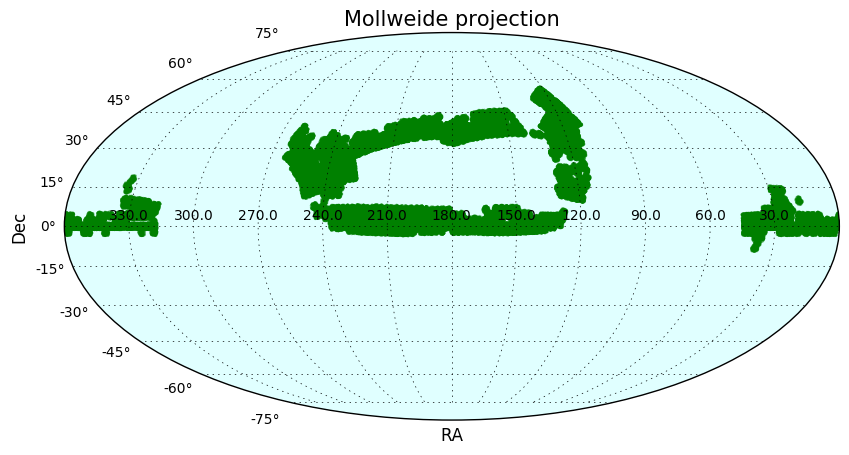

In [52]:
plot_mwd(data['coordinate'].ra.degree,data['coordinate'].dec.degree, org=180.)

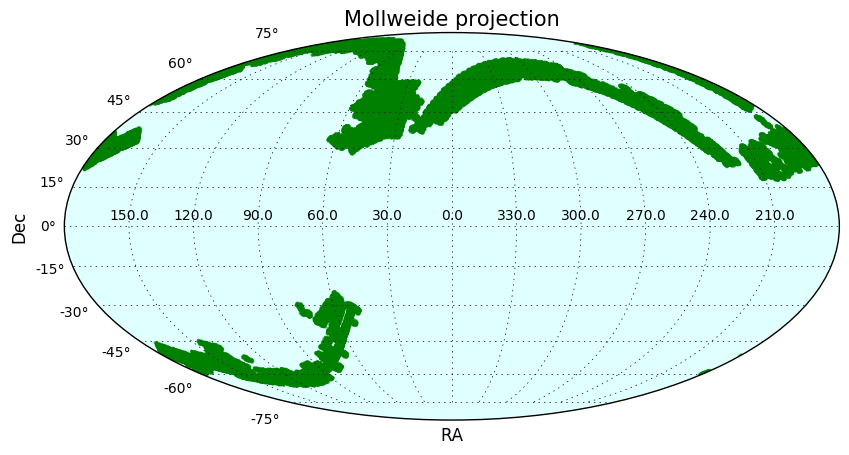

In [54]:
plot_mwd(data['coordinate'].galactic.l.degree,data['coordinate'].galactic.b.degree, org=0.)

(array([  2.53200000e+03,   1.30560000e+04,   5.14700000e+03,
          2.56730000e+04,   2.86790000e+04,   9.59600000e+03,
          2.60000000e+03,   4.35000000e+02,   9.90000000e+01,
          5.00000000e+00]),
 array([ 0.058 ,  0.6377,  1.2174,  1.7971,  2.3768,  2.9565,  3.5362,
         4.1159,  4.6956,  5.2753,  5.855 ]),
 <a list of 10 Patch objects>)

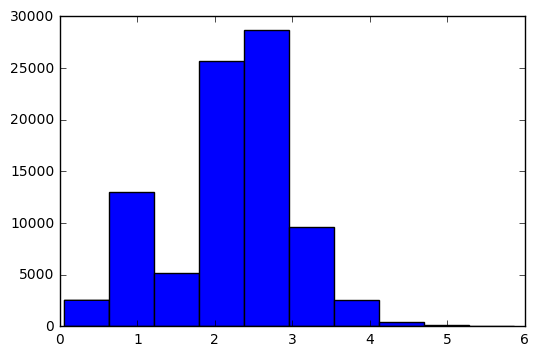

In [56]:
plt.hist(data['Z_VI'])

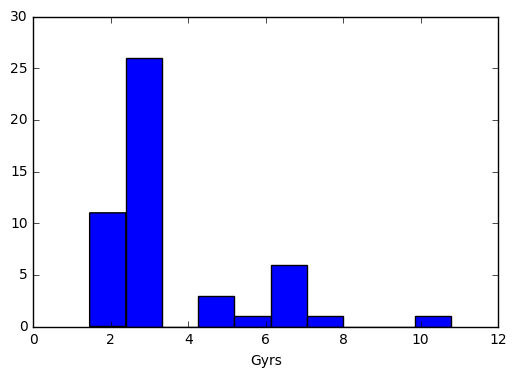

In [66]:
# load a standard cosmology
cosmo = cos.WMAP9

plt.hist(cosmo.age(truncated_data['Z_VI']))
plt.xlabel('Gyrs')

(array([ 41.,   6.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.11598282,  0.12964881,  0.1433148 ,  0.15698079,  0.17064677,
         0.18431276,  0.19797875,  0.21164473,  0.22531072,  0.23897671,
         0.25264269]),
 <a list of 10 Patch objects>)

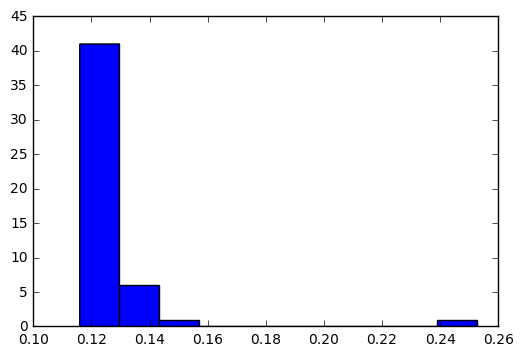

In [67]:
# arcsec/kpc
plt.hist(cosmo.arcsec_per_kpc_proper(truncated_data['Z_VI']))

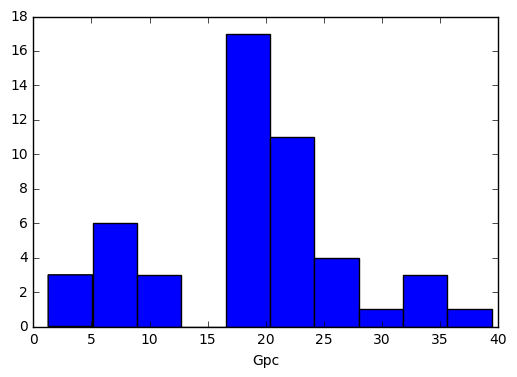

In [72]:
# luminosity distance
plt.hist(cosmo.luminosity_distance(truncated_data['Z_VI'])/1000)
plt.xlabel('Gpc')

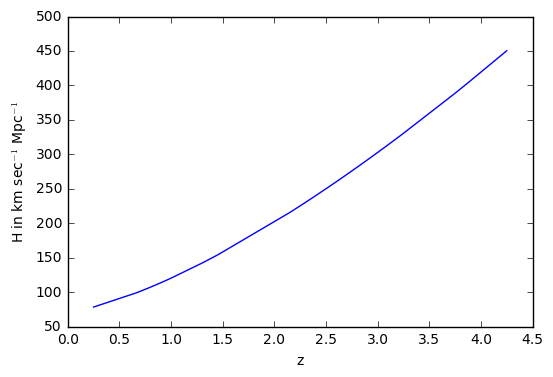

In [85]:
plt.plot(np.sort(truncated_data['Z_VI']), np.sort(cosmo.H(truncated_data['Z_VI'])), '-')
plt.xlabel('z')
plt.ylabel(r'H in km sec$^{-1}$ Mpc$^{-1}$')

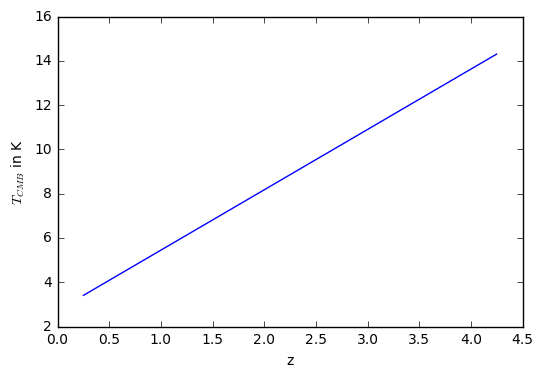

In [87]:
# Temp of CMB at z=1
plt.plot(np.sort(truncated_data['Z_VI']), np.sort(cosmo.Tcmb(truncated_data['Z_VI'])), '-')
plt.xlabel('z')
plt.ylabel(r'$T_{CMB}$ in K')

In [86]:
# H_0
cosmo.H0

<Quantity 69.32 km / (Mpc s)>

In [88]:
# What redshift is it when the Universe is 500 Myr old?
import astropy.units as u
cos.z_at_value(cosmo.age, 500 * u.Myr)

9.6930902880244503

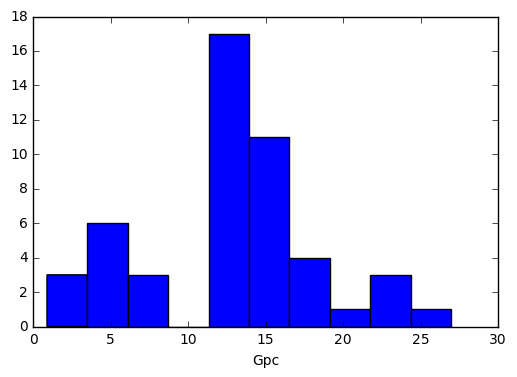

In [89]:
# Now, define our own cosmology, old-school H0 value, but keep the Universe
# flat

mycos = cos.FlatLambdaCDM(H0=100, Om0=0.3)
plt.hist(mycos.luminosity_distance(truncated_data['Z_VI'])/1000)
plt.xlabel('Gpc')